In [1]:
import datetime as dt
import matplotlib as mp
import numpy as np
from data_wrangling import *
from analytics import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
pd.set_option('display.max_columns', 150)
# documentation: https://support.google.com/analytics/answer/3437719?hl=en

In [2]:
%%time
cool_columns = ['fullVisitorId', 'date', 'geoNetwork_city', 'geoNetwork_country', 'device_browser','visits', 'paying_visits', 'totals_totalTransactionRevenue']

trainCSV = pd.read_csv('train_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False).drop(columns=['trafficSource_campaignCode'])
#testCSV  = pd.read_csv('test_v2_flat.csv', sep=',', encoding='utf-8', low_memory=False)

trainCSV = fill_empty_values(trainCSV)
#testCSV = fill_empty_values(testCSV)


trainCSV = trainCSV[cool_columns]
start_train_visits = trainCSV.date.min()
end_train_visits = trainCSV.date.max() - timedelta(days=276)

train_visits = trainCSV[(trainCSV.date >= start_train_visits) & (trainCSV.date<end_train_visits)]
validation_visits = trainCSV[(trainCSV.date>= end_train_visits)]
#test_visits = testCSV


CPU times: user 45 s, sys: 4.03 s, total: 49 s
Wall time: 50.3 s


In [3]:
get_basic_info(train_visits)

,dtype,empty_values,mode,types,unique_elements
column_name,,,,,
fullVisitorId,object,0,1957458976293878100,{<type 'str'>: 895079},707719
date,datetime64[ns],0,2017-04-25 18:49:35,{<class 'pandas._libs.tslibs.timestamps.Timest...,878715
geoNetwork_city,object,0,not available in demo dataset,{<type 'str'>: 895079},648
geoNetwork_country,object,0,United States,{<type 'str'>: 895079},222
device_browser,object,0,Chrome,{<type 'str'>: 895079},54
visits,float64,0,1,{<type 'float'>: 895079},1
paying_visits,float64,0,0,{<type 'float'>: 895079},2
totals_totalTransactionRevenue,float64,0,0,{<type 'float'>: 895079},6132


In [4]:
%%time
train = get_training_data_from_visits(train_visits)
validation = get_training_data_from_visits(validation_visits)

CPU times: user 25.3 s, sys: 1.29 s, total: 26.6 s
Wall time: 27 s


In [5]:
%%time
train_e = label_encode_object_dtypes(encoder_trainer = train, df_to_encode = train)
validation_e = label_encode_object_dtypes(encoder_trainer = train, df_to_encode = validation)
train_e.to_csv("train_e.csv")
validation_e.to_csv("validation_e.csv")

CPU times: user 1min 16s, sys: 1.29 s, total: 1min 17s
Wall time: 1min 18s


In [6]:
get_basic_info(train_e)

,dtype,empty_values,mode,types,unique_elements
column_name,,,,,
geoNetwork_city,float64,0,0.004972,{<type 'float'>: 1475236},35
geoNetwork_country,float64,0,0.000000,{<type 'float'>: 1475236},13
device_browser,float64,0,0.010136,{<type 'float'>: 1475236},6
visits_last_1_months,float64,0,0.000000,{<type 'float'>: 1475236},39
paying_visits_last_1_months,float64,0,0.000000,{<type 'float'>: 1475236},8
totals_totalTransactionRevenue_last_1_months,float64,0,0.000000,{<type 'float'>: 1475236},1750
visits_last_3_months,float64,0,0.000000,{<type 'float'>: 1475236},69
paying_visits_last_3_months,float64,0,0.000000,{<type 'float'>: 1475236},10
totals_totalTransactionRevenue_last_3_months,float64,0,0.000000,{<type 'float'>: 1475236},2757


## Given that out of the 1.3M rows in the training data, only 500 have target different than zero, I starter playing with this problem as a classification, so binarized the target

In [7]:
X_train = train_e.drop(columns=['target'])
y_train = train_e.target.apply(lambda x: 1 if x>0 else 0) ## for now we just put a binary target

X_validation = validation_e.drop(columns=['target'])
y_validation = validation_e.target.apply(lambda x: 1 if x>0 else 0) ## for now we just put a binary target

In [8]:
## logistic_regression_cv...

In [9]:
## naive bayes

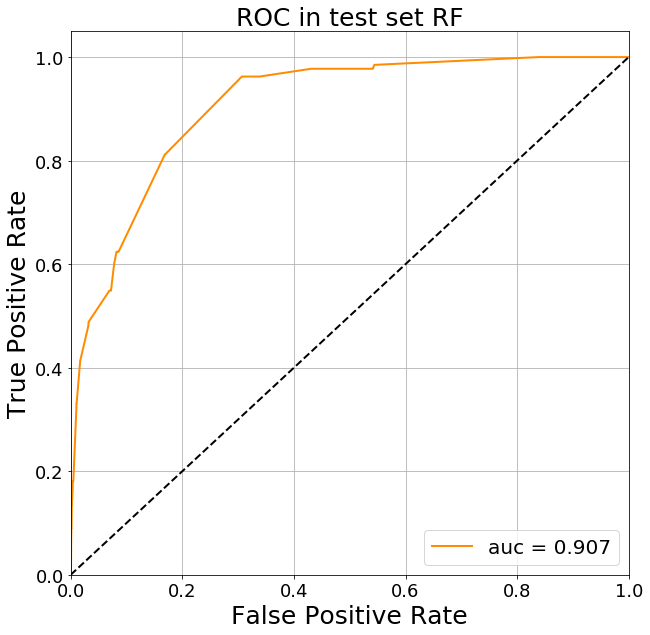

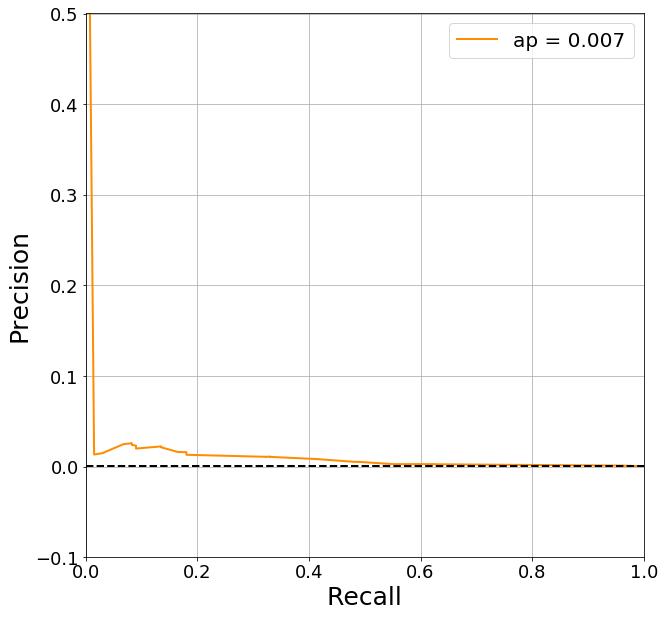

Best parameter (CV score=0.916):
{'n_estimators': 5, 'max_depth': 2, 'min_samples_leaf': 10}


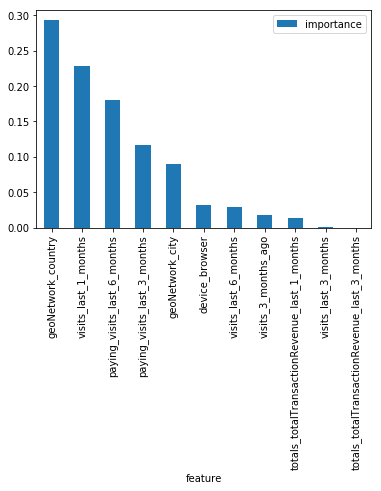

In [11]:
clf = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'min_samples_leaf' : [2, 5, 10, 20], # Best:
    'max_depth': [2, 10, 20], # Best:
    'n_estimators': [5, 20, 100, 200] # Best:      
}

search = GridSearchCV(clf, param_grid)
search.fit(X_train, y_train)

y_predicted_probability = search.predict_proba(X_validation)[:,1]
plot_roc_curve(y_validation, y_predicted_probability, title="ROC in test set RF")
plot_precision_recall_curve(y_validation, y_predicted_probability)

all_features =pd.DataFrame({'feature': X_train.columns, 'importance': search.best_estimator_.feature_importances_})
all_features = all_features.sort_values(by=['importance'], ascending=False).set_index('feature')
all_features[all_features.importance>0].plot.bar()

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

/Users/lduque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/lduque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/lduque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/lduque/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array 

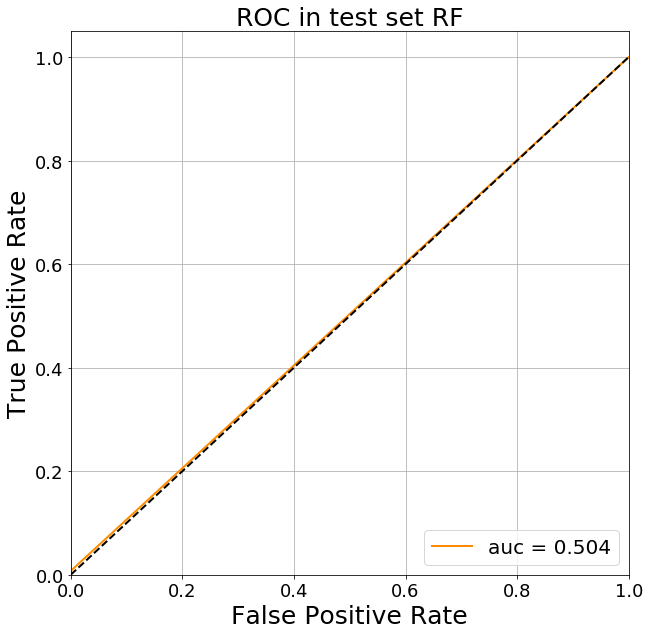

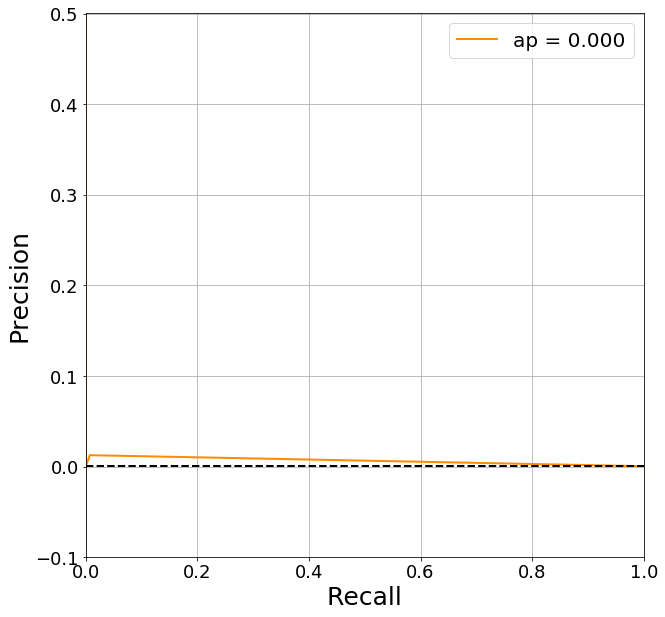

Best parameter (CV score=1.000):
{'n_estimators': 3, 'reg_lambda': 30, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 100}


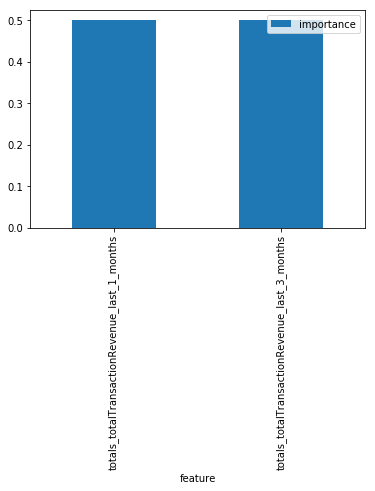

In [12]:
clf = XGBClassifier()
param_grid = {
    'max_depth':[8],    
    'n_estimators': [3], 
    'learning_rate' : [0.1], 
    'min_child_weight' : [100], 
    'reg_lambda': [30] 
}

search = GridSearchCV(clf, param_grid)
search.fit(X_train, y_train)

y_predicted_probability = search.predict_proba(X_validation)[:,1]
plot_roc_curve(y_validation, y_predicted_probability, title="ROC in test set RF")
plot_precision_recall_curve(y_validation, y_predicted_probability)

all_features =pd.DataFrame({'feature': X_train.columns, 'importance': search.best_estimator_.feature_importances_})
all_features = all_features.sort_values(by=['importance'], ascending=False).set_index('feature')
all_features[all_features.importance>0].plot.bar()

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)